In [17]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('./deeplearning.mplstyle')
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from lab_utils_common import dlc
from lab_coffee_utils import load_coffee_data, plt_roast, plt_prob, plt_layer, plt_network, plt_output_unit
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)


In [18]:
X,Y = load_coffee_data()
print(X.shape,Y.shape) 

(200, 2) (200, 1)


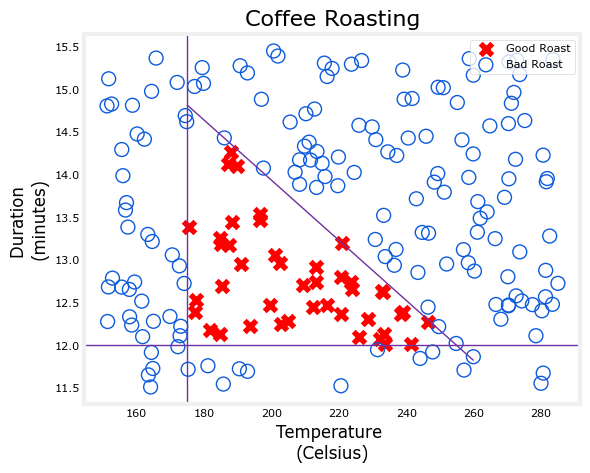

In [19]:
plt_roast(X,Y)

In [20]:
print(f"Temperature Max, Min pre normalization: {np.max(X[:,0]):0.2f}")
print(f"Duration Max, Min pre normalization: {np.max(X[:,1]):0.2f}")
norm_l = tf.keras.layers.Normalization(axis=-1)
norm_l.adapt(X)
Xn = norm_l(X)
print(f"Temperature Max, Min post normalization: {np.max(Xn[:,0]):0.2f},{np.min(Xn[:,0]):0.2f}")
print(f"Duration Max, Min post normalization: {np.max(Xn[:,1]):0.2f},{np.min(Xn[:,1]):0.2f}")

Temperature Max, Min pre normalization: 284.99
Duration Max, Min pre normalization: 15.45
Temperature Max, Min post normalization: 1.66,-1.69
Duration Max, Min post normalization: 1.79,-1.70


In [21]:
Xt = np.tile(Xn,(1000,1))
Yt = np.tile(Y,(1000,1))
print(Xt.shape,Yt.shape)

(200000, 2) (200000, 1)


In [22]:
tf.random.set_seed(1234)
#Sequential is a linear stack of layers
model = Sequential([
    tf.keras.Input(shape=(2,)),
    Dense(3,activation='sigmoid',name='layer1'),
    Dense(1,activation='sigmoid',name='layer2')
])

In [23]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 3)                 9         
                                                                 
 layer2 (Dense)              (None, 1)                 4         
                                                                 
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


In [24]:
L1_num_params = 2*3 + 3 
L2_num_params = 3*1 + 1
print(f"L1 params: {L1_num_params}, L2 params:{L2_num_params}")

L1 params: 9, L2 params:4


In [25]:
W1,b1 = model.get_layer('layer1').get_weights()
W2,b2 = model.get_layer('layer2').get_weights()
print(F"W1 {W1.shape}:{W1}\n, b1{b1.shape}:{b1}")
print(f"W2 {W2.shape}:{W2}\n b2{b2.shape}:{b2}")

W1 (2, 3):[[-0.32  1.03 -0.13]
 [-0.37 -0.25 -0.36]]
, b1(3,):[0. 0. 0.]
W2 (3, 1):[[ 0.69]
 [-0.19]
 [-0.6 ]]
 b2(1,):[0.]


In [26]:
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),)
model.fit(Xt,Yt,epochs=10)

Epoch 1/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.1840
Epoch 2/10
6250/6250 [==============================] - 13s 2ms/step - loss: 0.1299
Epoch 3/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.1177
Epoch 4/10
6250/6250 [==============================] - 9s 2ms/step - loss: 0.0620
Epoch 5/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.0187
Epoch 6/10
6250/6250 [==============================] - 20s 3ms/step - loss: 0.0119
Epoch 7/10
6250/6250 [==============================] - 15s 2ms/step - loss: 0.0083
Epoch 8/10
6250/6250 [==============================] - 9s 1ms/step - loss: 0.0059
Epoch 9/10
6250/6250 [==============================] - 9s 2ms/step - loss: 0.0042
Epoch 10/10
6250/6250 [==============================] - 10s 2ms/step - loss: 0.0031


In [30]:
X_test = np.array([[200,13.9],[200,17]])
X_testn = norm_l(X_test)
pred = model.predict(X_testn)
print(f"predictions: {pred}")


1/1 [==============================] - 0s 25ms/step
predictions: [[9.75e-01]
 [1.24e-04]]


In [31]:
y_hat = np.zeros_like(pred)
for i in range(len(pred)):
    if pred[i] >= 0.5:
        y_hat[i] = 1
    else:
        y_hat[i] = 0
print(f"decision:{y_hat}")

decision:[[1.]
 [0.]]


In [32]:
y_hat = (pred >= 0.5).astype(int)
print(f"Decisions: {y_hat}")

Decisions: [[1]
 [0]]


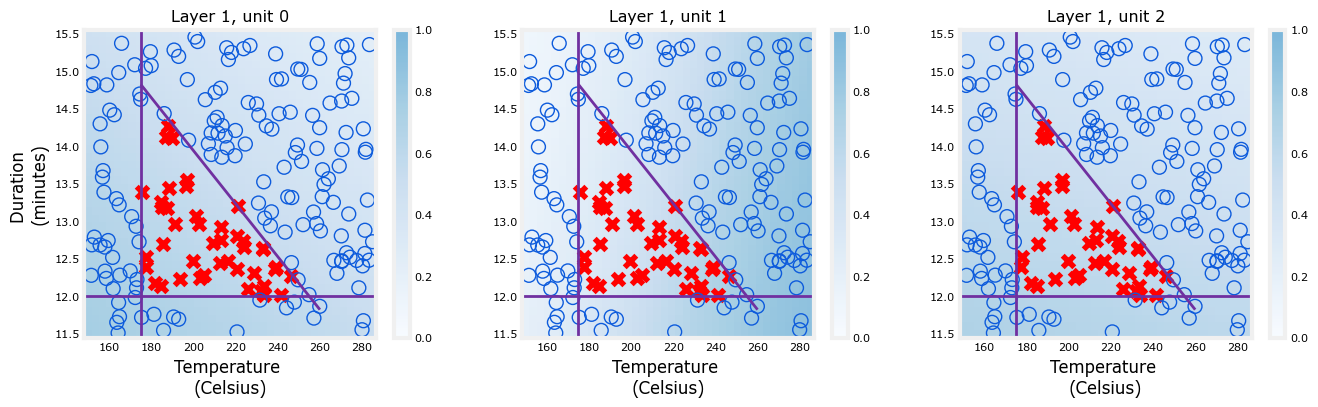

In [33]:
plt_layer(X,Y.reshape(-1,),W1,b1,norm_l)

7/7 [==============================] - 0s 2ms/step


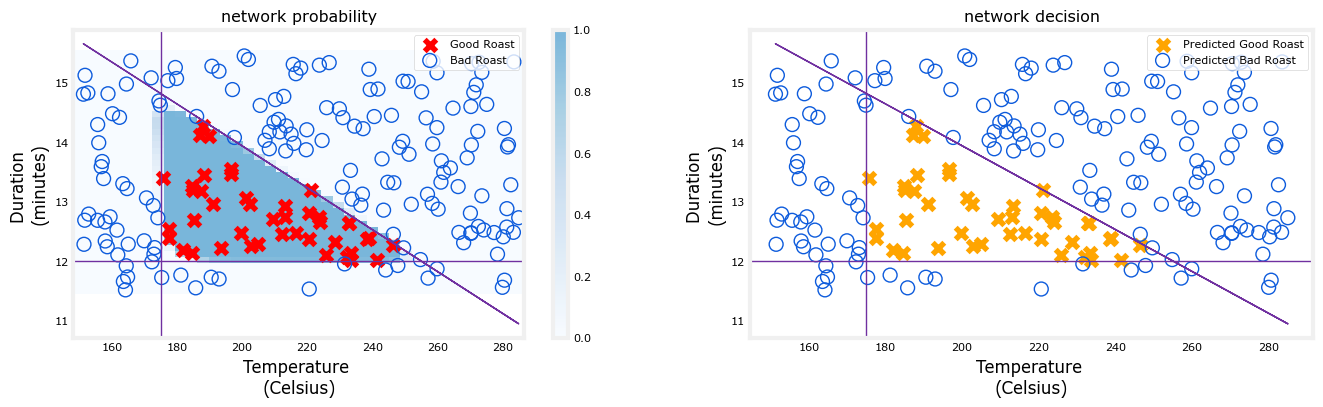

In [34]:
netf = lambda x: model.predict(norm_l(x))
plt_network(X,Y,netf)